In [2]:
import xarray.plot as xplt
%matplotlib inline
from notebooks.Marco.use_case_9 import ect_load_ds, ect_adjust_geometry, ect_regional_subset

In [3]:
## Step 1 - Read two ECVs
sst_ds = ect_load_ds('sst')
oc_ds = ect_load_ds('oc')
# select one Variable from each ECV
chla_da = oc_ds.chlor_a
sst_da = sst_ds.analysed_sst

In [4]:
chla_da

<xarray.DataArray 'chlor_a' (time: 12, lat: 4320, lon: 8640)>
dask.array<concate..., shape=(12, 4320, 8640), dtype=float64, chunksize=(1, 4320, 8640)>
Coordinates:
  * lon      (lon) float32 -179.979 -179.938 -179.896 -179.854 -179.813 ...
  * lat      (lat) float32 89.9792 89.9375 89.8958 89.8542 89.8125 89.7708 ...
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name: Chlorophyll-a concentration in seawater (not log-transformed), generated by SeaDAS using OC4v6 for SeaWiFS
    units: milligram m-3
    ancillary_variables: chlor_a_log10_rmsd,chlor_a_log10_bias
    grid_mapping: crs
    parameter_vocab_uri: http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard: mg m^-3

In [5]:
sst_da

<xarray.DataArray 'analysed_sst' (time: 12, lat: 3600, lon: 7200)>
dask.array<concate..., shape=(12, 3600, 7200), dtype=float64, chunksize=(1, 3600, 7200)>
Coordinates:
  * lat      (lat) float32 -89.975 -89.925 -89.875 -89.825 -89.775 -89.725 ...
  * lon      (lon) float32 -179.975 -179.925 -179.875 -179.825 -179.775 ...
  * time     (time) datetime64[ns] 1947-05-12T09:58:14 2015-05-05T15:22:30 ...
Attributes:
    units: kelvin
    long_name: analysed sea surface temperature
    valid_min: -300
    valid_max: 4500
    standard_name: sea_water_temperature
    depth: 20 cm
    source: ATSR<1,2>-ESACCI-L3U-v1.0, AATSR-ESACCI-L3U-v1.0, AVHRR<12,14,15,16,17,18>_G-ESACCI-L2P-v1.0, AVHRRMTA-ESACCI-L2P-v1.0
    comment: SST analysis produced for ESA SST CCI project using the OSTIA system in reanalysis mode.

In [24]:
## Step 2 - Geometric Adjustments
# We make the OC data apply to spatial resolution of SST, because the latter is lower.
chla_da_low = ect_adjust_geometry(master=sst_da, slave=chla_da)
chla_da_low

KeyboardInterrupt: 

In [14]:
## Step 3 - Spatial Subsetting
lat_slice = slice(30., 45.)
lon_slice = slice(-60., -45.)

chla_da_sub = ect_regional_subset(chla_da_low, lat_slice=lat_slice, lon_slice=lon_slice)
sst_da_sub = ect_regional_subset(sst_da, lat_slice=lat_slice, lon_slice=lon_slice)

NameError: name 'chla_da_low' is not defined

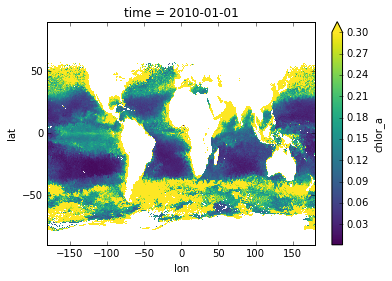

In [10]:
xplt.imshow(oc_ds.chlor_a.isel(time=0), vmax=0.3)

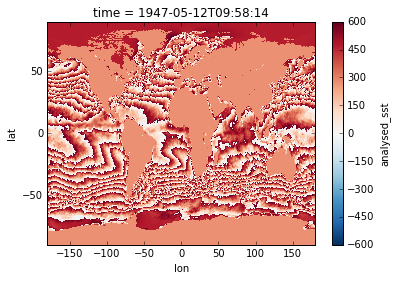

In [11]:
xplt.imshow(sst.isel(time=0))